# Curing Epilepsy
## from Schrodinger Equation to Alphafold

- Finite difference method
- Numerov method
- Shooting method

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Finite difference method

In [ ]:
n_grid=3000
x=np.linspace(1e-9,1000,n_grid+1)[1:]

h=x[1]-x[0]
D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1)
D = D / h

D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

eig_non, psi_non=np.linalg.eigh(-D2/2)

for i in range(5):
    plt.plot(x,psi_non[:,i], label=f"{eig_non[i]:.4f}")

## Numerov method

In [14]:
def f(current, E):
    return -2*(1/current+E)

def w_aux(current, h, E):
    return 1 - h**2*f(current+h, E)/12

def dx_aux(current, h, E):
    return 1 - h**2*f(current+h, E)/6

def xh_aux(current, h, E):
    return 2+5*h**2*f(current, E)/6

def numerator(current, h, x_current, dx_current, E):
    return xh_aux(current, h, E) * w_aux(current, -h, E) * x_current + 2*h*dx_current*dx_aux(current, -h, E)

def denominator(current, h, x_current, dx_current, E):
    return w_aux(current, h, E) * dx_aux(current, -h, E) + w_aux(current, -h, E) * dx_aux(current, h, E)

def xh(current, h, x_current, dx_current, E):
    return numerator(current, h, x_current, dx_current, E) / denominator(current, h, x_current, dx_current, E)

# forward

In [15]:
E = -0.5

current = 0.00002
h = 0.00001
x_current = 0
dx_current = 0.001

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(500000)):
    
    x_next = xh(current, h, x_current, dx_current, E=-0.5)
    
    x_next_leap_frog = xh(current, 0.75*h, x_current, dx_current, E=-0.5)
    
    dx_current = (x_next - x_next_leap_frog)/(0.25*h)
    
    x_current = x_next
    current = current + h
    
    r_values.append(current)
    xh_values.append(x_current)
    

100%|███████████████████████████████| 500000/500000 [00:02<00:00, 231401.81it/s]


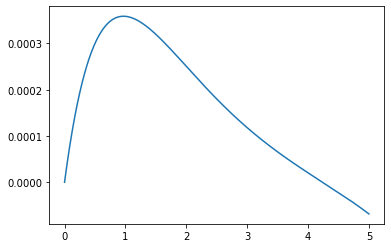

In [130]:
plt.plot(r_values, xh_values)

In [131]:
r_values = np.array(r_values)

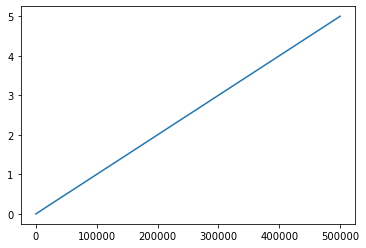

In [132]:
plt.plot(r_values)

In [133]:
exact = r_values * np.exp(-r_values)

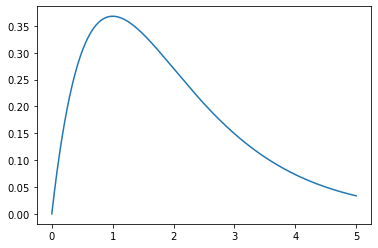

In [134]:
plt.plot(r_values, exact)

In [135]:
r_values

array([3.00000e-05, 4.00000e-05, 5.00000e-05, ..., 5.00000e+00,
       5.00001e+00, 5.00002e+00])

# backward

In [96]:
E = -0.1
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(int(current / h))):
    
    x_next = xh(current, -h, x_current, dx_current, E=-0.5)
    
    x_next_leap_frog = xh(current, -0.75*h, x_current, dx_current, E=-0.5)
    
    dx_current = (x_next - x_next_leap_frog)/(-0.25*h)
    
    x_current = x_next
    current = current - h
    
    r_values.append(current)
    xh_values.append(-x_current)
    

100%|███████████████████████████████| 999999/999999 [00:04<00:00, 229683.53it/s]


In [97]:
r_values[-1]

1.0000209408935746e-05

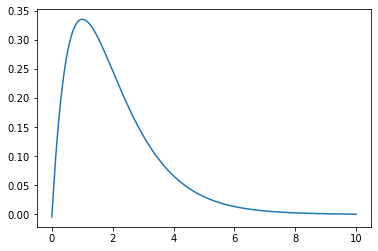

In [98]:
plt.plot(r_values[::-1], xh_values[::-1])

In [100]:
r_values[-1]

1.0000209408935746e-05

In [140]:
xh_values

[7.000000000046668e-09,
 1.400000000052792e-08,
 2.1000000002015425e-08,
 2.800000000508086e-08,
 3.500000001029589e-08,
 4.2000000018232204e-08,
 4.900000002946144e-08,
 5.60000000445553e-08,
 6.300000006408546e-08,
 7.000000008862355e-08,
 7.700000011874129e-08,
 8.400000015501031e-08,
 9.100000019800227e-08,
 9.800000024828883e-08,
 1.050000003064416e-07,
 1.1200000037303234e-07,
 1.1900000044863267e-07,
 1.2600000053381426e-07,
 1.330000006291488e-07,
 1.4000000073520785e-07,
 1.4700000085256307e-07,
 1.540000009817861e-07,
 1.6100000112344857e-07,
 1.6800000127812226e-07,
 1.750000014463789e-07,
 1.8200000162879e-07,
 1.8900000182592734e-07,
 1.9600000203836253e-07,
 2.0300000226666724e-07,
 2.100000025114132e-07,
 2.1700000277317216e-07,
 2.2400000305251576e-07,
 2.3100000335001561e-07,
 2.380000036662433e-07,
 2.450000040017704e-07,
 2.5200000435716843e-07,
 2.590000047330093e-07,
 2.6600000512986454e-07,
 2.730000055483061e-07,
 2.800000059889054e-07,
 2.870000064522342e-07,
 2

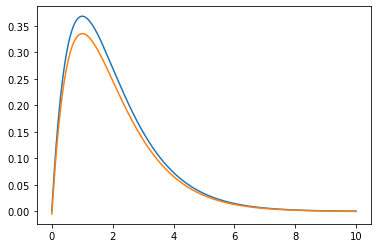

In [141]:
r_values = np.array(r_values)
exact = r_values * np.exp(-r_values)

plt.plot(r_values, exact)
plt.plot(r_values[::-1], xh_values[::-1])

## Shooting Method

In [17]:
def numerov(E, h, current, x_current=0, dx_current=0.007, direction=-1):
    # E = -0.1
    # current = 10
    # h = 0.00001
    # x_current = 0
    # dx_current = 0.0007

    # x_prev = xh(current, -h, x_current, dx_current)

    
    if direction not in [-1, 1]:
        raise Exception("Invalid direction")

    n_steps = int(current / h)

    r_values = np.zeros((n_steps, ), dtype=float)
    xh_values = np.zeros((n_steps, ), dtype=float)

    
    # for i in tqdm(range(n_steps), position=0, leave=True):
    for i in range(n_steps):

        x_next = xh(current, h*direction, x_current, dx_current, E=E)

        x_next_leap_frog = xh(current, 0.75*h*direction, x_current, dx_current, E=E)

        dx_current = (x_next - x_next_leap_frog)/(0.25*h*direction)

        x_current = x_next
        current = current + h * direction

        r_values[::direction][i] = current
        xh_values[::direction][i] = x_current
        
    normalization_factor = np.sqrt((xh_values * xh_values).sum())
    
    xh_values /= normalization_factor
        
    return r_values, xh_values * direction, xh_values[0], xh_values[-1]

In [18]:
E = -0.5
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

r_values, xh_values, u0, un = numerov(E, h, current, x_current=x_current, dx_current=dx_current, direction=-1)

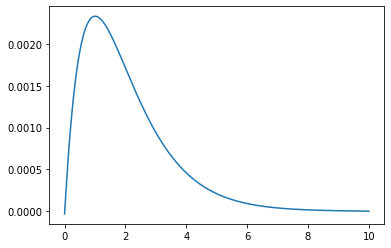

In [19]:
plt.plot(r_values, xh_values)

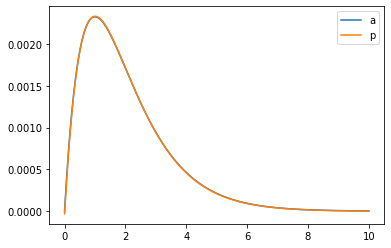

In [20]:
exact = r_values * np.exp(-r_values)
exact /= np.sqrt((exact*exact).sum())
plt.plot(r_values, exact)
plt.legend("exact")
plt.plot(r_values, xh_values)
plt.legend("approx")

In [28]:
E_guess = np.linspace(-0.7, 0.7, int(1.4/0.01))

In [29]:
E_guess

array([-0.7       , -0.68992806, -0.67985612, -0.66978417, -0.65971223,
       -0.64964029, -0.63956835, -0.6294964 , -0.61942446, -0.60935252,
       -0.59928058, -0.58920863, -0.57913669, -0.56906475, -0.55899281,
       -0.54892086, -0.53884892, -0.52877698, -0.51870504, -0.50863309,
       -0.49856115, -0.48848921, -0.47841727, -0.46834532, -0.45827338,
       -0.44820144, -0.4381295 , -0.42805755, -0.41798561, -0.40791367,
       -0.39784173, -0.38776978, -0.37769784, -0.3676259 , -0.35755396,
       -0.34748201, -0.33741007, -0.32733813, -0.31726619, -0.30719424,
       -0.2971223 , -0.28705036, -0.27697842, -0.26690647, -0.25683453,
       -0.24676259, -0.23669065, -0.22661871, -0.21654676, -0.20647482,
       -0.19640288, -0.18633094, -0.17625899, -0.16618705, -0.15611511,
       -0.14604317, -0.13597122, -0.12589928, -0.11582734, -0.1057554 ,
       -0.09568345, -0.08561151, -0.07553957, -0.06546763, -0.05539568,
       -0.04532374, -0.0352518 , -0.02517986, -0.01510791, -0.00

In [33]:
E = -0.5
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

_, _, u0_last, _ = numerov(-0.7, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
# for egs in tqdm(E_guess, position=0, leave=True):
for egs in E_guess:
    _, _, u0_current, _ = numerov(egs, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
    
    # print("egs: ", egs, "u_0: ", u0_current)
    
    if u0_current * u0_last < 0:
        print("guess: ", egs)
        
    u0_last = u0_current

guess:  -0.5086330935251798
guess:  -0.11582733812949642
guess:  0.08561151079136686


KeyboardInterrupt: 

In [ ]:
np.logspace(np.log(1e-20), np.log(10), 1000, base=np.e)

In [271]:
def numerov_log(E, current, start=1e-37, end=10, x_current=0, dx_current=0.007, direction=-1, n_steps=1000):
    # E = -0.1
    # current = 10
    # h = 0.00001
    # x_current = 0
    # dx_current = 0.0007

    # x_prev = xh(current, -h, x_current, dx_current)

    
    if direction not in [-1, 1]:
        raise Exception("Invalid direction")

    # n_steps = int(current / h)
    
    grids = np.logspace(np.log(start), np.log(current), n_steps+1, base=np.e)[:]
    # grids = np.linspace(1e-5, current, n_steps+2)[1:]

    r_values = np.zeros((n_steps, ), dtype=float)
    xh_values = np.zeros((n_steps, ), dtype=float)

    
    # for i in tqdm(range(n_steps), position=0, leave=True):
    for i in range(n_steps):

        h = grids[::direction][i+1] -  grids[::direction][i]
        # print("h: ", h)
        
        current = grids[::direction][i]

        x_next = xh(current, h, x_current, dx_current, E=E)

        x_next_leap_frog = xh(current, 0.75*h, x_current, dx_current, E=E)

        dx_current = (x_next - x_next_leap_frog)/(0.25*h)

        x_current = x_next
        # current = current + h * direction

        r_values[::direction][i] = current
        xh_values[::direction][i] = x_current
        
    normalization_factor = np.sqrt((xh_values * xh_values).sum())
    
    xh_values /= normalization_factor
        
    return r_values, xh_values, xh_values[0], xh_values[-1]

In [251]:
E = -0.5
current = 10
# h = 0.00001
x_current = 0
dx_current = 0.0007

rv, xhv, u0, un = numerov_log(E, current, start=1e-37, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=1000)

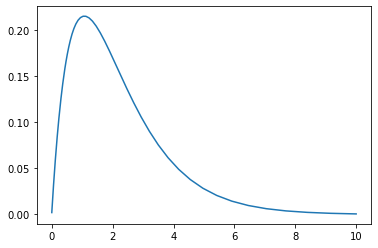

In [252]:
plt.plot(rv, xhv)

In [253]:
np.linspace(1e-5, 10, 200000+2)[1:]

array([5.999970e-05, 1.099994e-04, 1.599991e-04, ..., 9.999900e+00,
       9.999950e+00, 1.000000e+01])

In [261]:
# E = -0.5
E_guess = np.linspace(-0.7, 0, int(0.7/0.0005))
current = 200
# h = 0.00001
x_current = 0
dx_current = 0.0007
start = 1e-20
n_steps = 5000

E_guessed = []
_, _, u0_last, _ = numerov_log(-0.7, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
# for egs in tqdm(E_guess, position=0, leave=True):
for egs in E_guess:
    _, _, u0_current, _ = numerov_log(egs, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # print("egs: ", egs, "u_0: ", u0_current)
    
    if u0_current * u0_last < 0:
        print("guess: ", egs)
        E_guessed.append(egs)
        
    u0_last = u0_current

guess:  -0.507725321888412
guess:  -0.12668097281831192
guess:  -0.056080114449213125
guess:  -0.03154506437768245
guess:  -0.02002861230329045
guess:  -0.014020028612303337
guess:  -0.010014306151645225
guess:  -0.007510729613733891
guess:  -0.006008583690987113
guess:  -0.0045064377682403345
guess:  -0.0030042918454935563
guess:  -0.0010014306151645558


In [262]:
E_guessed = np.array(E_guessed)

In [263]:
E_guessed[0] / E_guessed

array([  1.        ,   4.00790514,   9.05357143,  16.0952381 ,
        25.35      ,  36.21428571,  50.7       ,  67.6       ,
        84.5       , 112.66666667, 169.        , 507.        ])

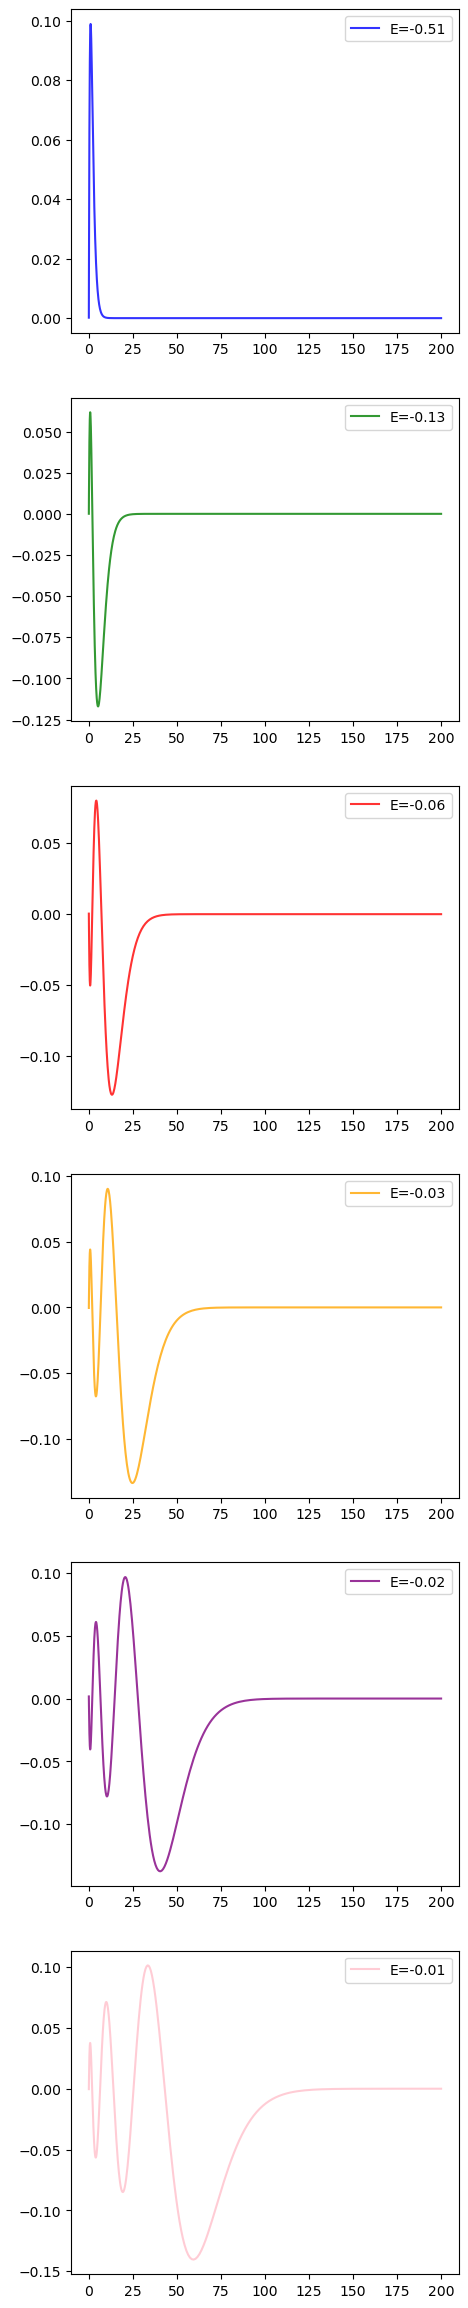

In [272]:
# fig = plt.figure(figsize=(10, 10), dpi=200)
fig, axes = plt.subplots(6, 1, figsize=(5, 30), dpi=100)
legends = []
colors = ["b", "g", "r", "orange", "purple", "pink"]
for i, egs in enumerate(E_guessed[:6]):
    rv, xhv, u0, un = numerov_log(egs, 200, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # plt.plot(rv, xhv, alpha=0.5)
    axes[i].plot(rv, xhv, alpha=0.8, color=colors[i])
    axes[i].legend([f"E={egs: .2f}"])
    # legends.append(f"E={egs: .3f}")
# plt.legend(legends)

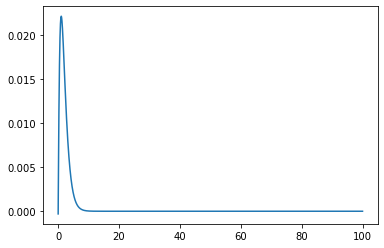

In [165]:
plt.plot(rv, xhv)

# root finding

In [285]:
from scipy.optimize import brentq


find_root = lambda e: numerov_log(e, 200, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)[2]

brentq(find_root, -0.7, -0.4)

-0.5065361432164921

In [288]:
energy_grids = -np.logspace(np.log(0.7), np.log(0.0000001), 100, base=np.e)

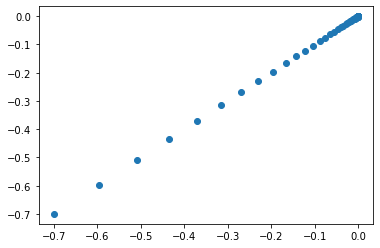

In [289]:
plt.scatter(energy_grids, energy_grids)

In [293]:
# E = -0.5
# E_guess = np.linspace(-0.7, 0, int(0.7/0.0005))
energy_grids = -np.logspace(np.log(0.7), np.log(0.0000001), 100, base=np.e)
current = 200
# h = 0.00001
x_current = 0
dx_current = 0.0007
start = 1e-20
n_steps = 5000

E_guessed = []
E_last = -0.7
_, _, u0_last, _ = numerov_log(E_last, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
# for egs in tqdm(E_guess, position=0, leave=True):
find_root = lambda e: numerov_log(e, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)[2]

for egs in E_guess:
    _, _, u0_current, _ = numerov_log(egs, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # print("egs: ", egs, "u_0: ", u0_current)
    
    
    
    if u0_current * u0_last < 0:
        print("guess range: ", E_last, egs)
        
        egs = brentq(find_root, E_last, egs)
        
        
        print("energy level: ", egs)
        
        E_guessed.append(egs)
        
    E_last = egs
        
    u0_last = u0_current

guess range:  -0.5082260371959942 -0.507725321888412
energy level:  -0.5081897865186182
guess range:  -0.12718168812589414 -0.12668097281831192
energy level:  -0.1270419418441074
guess range:  -0.05658082975679546 -0.056080114449213125
energy level:  -0.05645900822366701
guess range:  -0.032045779685264675 -0.03154506437768245
energy level:  -0.031754982139840425
guess range:  -0.020529327610872672 -0.02002861230329045
energy level:  -0.020320547959121537
guess range:  -0.01452074391988556 -0.014020028612303337
energy level:  -0.014109251174614463
guess range:  -0.010515021459227447 -0.010014306151645225
energy level:  -0.010364035913318807
guess range:  -0.008011444921316224 -0.007510729613733891
energy level:  -0.007933176321812964
guess range:  -0.006509298998569446 -0.006008583690987113
energy level:  -0.006255301573804934
guess range:  -0.005007153075822668 -0.0045064377682403345
energy level:  -0.004872366305979085
guess range:  -0.0035050071530758897 -0.0030042918454935563
energ

In [295]:
E_guessed = np.array(E_guessed)

In [296]:
E_guessed[0] / E_guessed

array([  1.        ,   4.00017332,   9.00103991,  16.0034663 ,
        25.00866549,  36.01819687,  49.03396619,  64.05880393,
        81.24145263, 104.30040654, 155.37418114, 393.23719452])

In [ ]:
# guess:  -0.507725321888412
# guess:  -0.12668097281831192
# guess:  -0.056080114449213125
# guess:  -0.03154506437768245
# guess:  -0.02002861230329045
# guess:  -0.014020028612303337
# guess:  -0.010014306151645225
# guess:  -0.007510729613733891
# guess:  -0.006008583690987113
# guess:  -0.0045064377682403345
# guess:  -0.0030042918454935563
# guess:  -0.0010014306151645558

In [297]:
np.sign

<ufunc 'sign'>